# Data Science Project Presentation

***

## Project Description

Your main objective is to develop an asset or group of assets that present the results of a data science project to the relevant stakeholders. The presentation will be based on the online retailer scenario that has been used throughout the Coursera Projects in the CDSP Specialization.

Your organization is an online retailer that sells a variety of different products. Each sale through the online storefront is recorded in a database with various characteristics, including customer name, customer address, sale price, quantity sold, and so on. The business leaders want to use this data to identify ways in which the business can cut down on wasteful spending in areas like product inventory, order fulfillment, and marketing.

A regression model that predicts how much money a customer will spend at the online store. By making this prediction, the business might be able to better project sales for a fiscal period for budgeting purposes, or better incentivize major customers to spend even more at the store.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import sklearn

import shap
import eli5
from IPython.display import display
import statsmodels.api as sm

import datetime
from datetime import datetime, timedelta


import scipy.stats

#from sklearn.experimental import enable_hist_gradient_boosting
#from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
#from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor
#from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)


from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, KFold, RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder


from sklearn.tree import export_graphviz, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score


import warnings
warnings.filterwarnings('ignore')

from pycaret.regression import *

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)


random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("retail.csv")

In [3]:
df

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,Month,Description_ASSORTED COLOUR BIRD ORNAMENT,Description_CREAM HANGING HEART T-LIGHT HOLDER,Description_JUMBO BAG RED RETROSPOT,Description_LUNCH BAG BLACK SKULL.,Description_LUNCH BAG RED RETROSPOT,Description_PARTY BUNTING,Description_POPCORN HOLDER,Description_REGENCY CAKESTAND 3 TIER,Description_SET OF 3 CAKE TINS PANTRY DESIGN
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom,15.30,12,0,1,0,0,0,0,0,0,0
1,536373,85123A,6,2010-12-01 09:02:00,2.55,u1785,United Kingdom,15.30,12,0,1,0,0,0,0,0,0,0
2,536375,85123A,6,2010-12-01 09:32:00,2.55,u1785,United Kingdom,15.30,12,0,1,0,0,0,0,0,0,0
3,536378,20725,10,2010-12-01 09:37:00,1.65,u14688,United Kingdom,16.50,12,0,0,0,0,1,0,0,0,0
4,536392,84879,16,2010-12-01 10:29:00,1.69,u13705,United Kingdom,27.04,12,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,581538,22197,4,2011-12-09 11:34:00,0.85,u14446,United Kingdom,3.40,12,0,0,0,0,0,0,1,0,0
9129,581538,20727,1,2011-12-09 11:34:00,1.65,u14446,United Kingdom,1.65,12,0,0,0,1,0,0,0,0,0
9130,581538,20725,1,2011-12-09 11:34:00,1.65,u14446,United Kingdom,1.65,12,0,0,0,0,1,0,0,0,0
9131,581579,22197,24,2011-12-09 12:19:00,0.85,u17581,United Kingdom,20.40,12,0,0,0,0,0,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9133 entries, 0 to 9132
Data columns (total 18 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Invoice                                         9133 non-null   int64  
 1   StockCode                                       9133 non-null   object 
 2   Quantity                                        9133 non-null   int64  
 3   InvoiceDate                                     9133 non-null   object 
 4   Price                                           9133 non-null   float64
 5   CustomerID                                      9133 non-null   object 
 6   Country                                         9133 non-null   object 
 7   TotalAmount                                     9133 non-null   float64
 8   Month                                           9133 non-null   int64  
 9   Description_ASSORTED COLOUR BIRD ORNAMENT

In [5]:
df.describe(include='all')

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,Month,Description_ASSORTED COLOUR BIRD ORNAMENT,Description_CREAM HANGING HEART T-LIGHT HOLDER,Description_JUMBO BAG RED RETROSPOT,Description_LUNCH BAG BLACK SKULL.,Description_LUNCH BAG RED RETROSPOT,Description_PARTY BUNTING,Description_POPCORN HOLDER,Description_REGENCY CAKESTAND 3 TIER,Description_SET OF 3 CAKE TINS PANTRY DESIGN
count,9133.00,9133,9133.00,9133,9133.00,9133,9133,9133.00,9133.00,9133.00,9133.00,9133.00,9133.00,9133.00,9133.00,9133.00,9133.00,9133.00
unique,NaN,10,NaN,5624,NaN,2130,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,85123A,NaN,2011-06-02 12:08:00,NaN,u17841,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1533,NaN,9,NaN,161,9133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,558595.95,NaN,7.52,NaN,2.47,NaN,NaN,14.47,6.99,0.11,0.17,0.12,0.11,0.12,0.11,0.08,0.00,0.10
std,12299.54,NaN,6.15,NaN,1.46,NaN,NaN,9.31,3.36,0.31,0.37,0.32,0.31,0.32,0.32,0.28,0.01,0.30
min,536365.00,NaN,1.00,NaN,0.00,NaN,NaN,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,548150.00,NaN,3.00,NaN,1.65,NaN,NaN,5.90,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,558481.00,NaN,6.00,NaN,1.95,NaN,NaN,14.75,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,568697.00,NaN,10.00,NaN,2.95,NaN,NaN,19.80,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [6]:
df.shape

(9133, 18)

In [7]:
df.columns

Index(['Invoice', 'StockCode', 'Quantity', 'InvoiceDate', 'Price', 'CustomerID', 'Country', 'TotalAmount', 'Month', 'Description_ASSORTED COLOUR BIRD ORNAMENT', 'Description_CREAM HANGING HEART T-LIGHT HOLDER', 'Description_JUMBO BAG RED RETROSPOT', 'Description_LUNCH BAG  BLACK SKULL.', 'Description_LUNCH BAG RED RETROSPOT', 'Description_PARTY BUNTING', 'Description_POPCORN HOLDER', 'Description_REGENCY CAKESTAND 3 TIER', 'Description_SET OF 3 CAKE TINS PANTRY DESIGN '], dtype='object')

### Groupby Function

In [8]:
df.groupby(['CustomerID']).sum()

,Invoice,Quantity,Price,TotalAmount,Month,Description_ASSORTED COLOUR BIRD ORNAMENT,Description_CREAM HANGING HEART T-LIGHT HOLDER,Description_JUMBO BAG RED RETROSPOT,Description_LUNCH BAG BLACK SKULL.,Description_LUNCH BAG RED RETROSPOT,Description_PARTY BUNTING,Description_POPCORN HOLDER,Description_REGENCY CAKESTAND 3 TIER,Description_SET OF 3 CAKE TINS PANTRY DESIGN
CustomerID,,,,,,,,,,,,,,
u12747,5607527,126,22.33,262.20,83,5,4,1,0,0,0,0,0,0
u12748,47869871,306,174.08,496.98,758,4,6,11,14,8,10,22,0,4
u12749,2281611,20,16.54,72.92,39,1,0,0,0,0,0,0,0,3
u1282,541283,6,2.95,17.70,1,0,1,0,0,0,0,0,0,0
u12822,566580,10,1.65,16.50,9,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
u18265,2255134,40,12.14,66.32,32,1,0,0,0,0,2,0,0,0
u18272,1675000,51,6.05,41.25,19,0,0,0,0,0,0,0,0,1
u18274,575485,3,4.95,14.85,11,0,0,0,0,0,0,0,0,1


In [9]:
df.groupby(['CustomerID']).mean()

,Invoice,Quantity,Price,TotalAmount,Month,Description_ASSORTED COLOUR BIRD ORNAMENT,Description_CREAM HANGING HEART T-LIGHT HOLDER,Description_JUMBO BAG RED RETROSPOT,Description_LUNCH BAG BLACK SKULL.,Description_LUNCH BAG RED RETROSPOT,Description_PARTY BUNTING,Description_POPCORN HOLDER,Description_REGENCY CAKESTAND 3 TIER,Description_SET OF 3 CAKE TINS PANTRY DESIGN
CustomerID,,,,,,,,,,,,,,
u12747,560752.70,12.60,2.23,26.22,8.30,0.50,0.40,0.10,0.00,0.00,0.00,0.00,0.00,0.00
u12748,563174.95,3.60,2.05,5.85,8.92,0.05,0.07,0.13,0.16,0.09,0.12,0.26,0.00,0.05
u12749,570402.75,5.00,4.13,18.23,9.75,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.75
u1282,541283.00,6.00,2.95,17.70,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
u12822,566580.00,10.00,1.65,16.50,9.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
u18265,563783.50,10.00,3.04,16.58,8.00,0.25,0.00,0.00,0.00,0.00,0.50,0.00,0.00,0.00
u18272,558333.33,17.00,2.02,13.75,6.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33
u18274,575485.00,3.00,4.95,14.85,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [10]:
df.groupby(['CustomerID']).median()

,Invoice,Quantity,Price,TotalAmount,Month,Description_ASSORTED COLOUR BIRD ORNAMENT,Description_CREAM HANGING HEART T-LIGHT HOLDER,Description_JUMBO BAG RED RETROSPOT,Description_LUNCH BAG BLACK SKULL.,Description_LUNCH BAG RED RETROSPOT,Description_PARTY BUNTING,Description_POPCORN HOLDER,Description_REGENCY CAKESTAND 3 TIER,Description_SET OF 3 CAKE TINS PANTRY DESIGN
CustomerID,,,,,,,,,,,,,,
u12747,561973.00,14.00,1.89,27.04,10.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
u12748,564534.00,3.00,1.65,4.65,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
u12749,569467.50,4.50,4.95,14.85,9.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
u1282,541283.00,6.00,2.95,17.70,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
u12822,566580.00,10.00,1.65,16.50,9.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
u18265,563783.50,6.00,3.32,16.66,8.00,0.00,0.00,0.00,0.00,0.00,0.50,0.00,0.00,0.00
u18272,559813.00,24.00,0.55,13.20,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
u18274,575485.00,3.00,4.95,14.85,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [11]:
df.groupby(['CustomerID']).count()

,Invoice,StockCode,Quantity,InvoiceDate,Price,Country,TotalAmount,Month,Description_ASSORTED COLOUR BIRD ORNAMENT,Description_CREAM HANGING HEART T-LIGHT HOLDER,Description_JUMBO BAG RED RETROSPOT,Description_LUNCH BAG BLACK SKULL.,Description_LUNCH BAG RED RETROSPOT,Description_PARTY BUNTING,Description_POPCORN HOLDER,Description_REGENCY CAKESTAND 3 TIER,Description_SET OF 3 CAKE TINS PANTRY DESIGN
CustomerID,,,,,,,,,,,,,,,,,
u12747,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
u12748,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85
u12749,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
u1282,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
u12822,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
u18265,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
u18272,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
u18274,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [12]:
df2 = pd.DataFrame(df.groupby(['CustomerID']).sum())

In [13]:
df2

,Invoice,Quantity,Price,TotalAmount,Month,Description_ASSORTED COLOUR BIRD ORNAMENT,Description_CREAM HANGING HEART T-LIGHT HOLDER,Description_JUMBO BAG RED RETROSPOT,Description_LUNCH BAG BLACK SKULL.,Description_LUNCH BAG RED RETROSPOT,Description_PARTY BUNTING,Description_POPCORN HOLDER,Description_REGENCY CAKESTAND 3 TIER,Description_SET OF 3 CAKE TINS PANTRY DESIGN
CustomerID,,,,,,,,,,,,,,
u12747,5607527,126,22.33,262.20,83,5,4,1,0,0,0,0,0,0
u12748,47869871,306,174.08,496.98,758,4,6,11,14,8,10,22,0,4
u12749,2281611,20,16.54,72.92,39,1,0,0,0,0,0,0,0,3
u1282,541283,6,2.95,17.70,1,0,1,0,0,0,0,0,0,0
u12822,566580,10,1.65,16.50,9,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
u18265,2255134,40,12.14,66.32,32,1,0,0,0,0,2,0,0,0
u18272,1675000,51,6.05,41.25,19,0,0,0,0,0,0,0,0,1
u18274,575485,3,4.95,14.85,11,0,0,0,0,0,0,0,0,1


In [14]:
df2_new = df2[["Quantity","TotalAmount"]]

In [15]:
df2_new

,Quantity,TotalAmount
CustomerID,,
u12747,126,262.20
u12748,306,496.98
u12749,20,72.92
u1282,6,17.70
u12822,10,16.50
...,...,...
u18265,40,66.32
u18272,51,41.25
u18274,3,14.85


In [16]:
df3 = pd.DataFrame(df.groupby(['CustomerID']).count())

In [17]:
df3

,Invoice,StockCode,Quantity,InvoiceDate,Price,Country,TotalAmount,Month,Description_ASSORTED COLOUR BIRD ORNAMENT,Description_CREAM HANGING HEART T-LIGHT HOLDER,Description_JUMBO BAG RED RETROSPOT,Description_LUNCH BAG BLACK SKULL.,Description_LUNCH BAG RED RETROSPOT,Description_PARTY BUNTING,Description_POPCORN HOLDER,Description_REGENCY CAKESTAND 3 TIER,Description_SET OF 3 CAKE TINS PANTRY DESIGN
CustomerID,,,,,,,,,,,,,,,,,
u12747,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
u12748,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85
u12749,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
u1282,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
u12822,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
u18265,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
u18272,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
u18274,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [18]:
df3.columns

Index(['Invoice', 'StockCode', 'Quantity', 'InvoiceDate', 'Price', 'Country', 'TotalAmount', 'Month', 'Description_ASSORTED COLOUR BIRD ORNAMENT', 'Description_CREAM HANGING HEART T-LIGHT HOLDER', 'Description_JUMBO BAG RED RETROSPOT', 'Description_LUNCH BAG  BLACK SKULL.', 'Description_LUNCH BAG RED RETROSPOT', 'Description_PARTY BUNTING', 'Description_POPCORN HOLDER', 'Description_REGENCY CAKESTAND 3 TIER', 'Description_SET OF 3 CAKE TINS PANTRY DESIGN '], dtype='object')

In [19]:
df3_new = df3[['Description_ASSORTED COLOUR BIRD ORNAMENT', 'Description_CREAM HANGING HEART T-LIGHT HOLDER', 
               'Description_JUMBO BAG RED RETROSPOT', 'Description_LUNCH BAG  BLACK SKULL.', 
               'Description_LUNCH BAG RED RETROSPOT', 'Description_PARTY BUNTING', 
               'Description_POPCORN HOLDER', 'Description_REGENCY CAKESTAND 3 TIER', 
               'Description_SET OF 3 CAKE TINS PANTRY DESIGN ']]

In [20]:
df3_new

,Description_ASSORTED COLOUR BIRD ORNAMENT,Description_CREAM HANGING HEART T-LIGHT HOLDER,Description_JUMBO BAG RED RETROSPOT,Description_LUNCH BAG BLACK SKULL.,Description_LUNCH BAG RED RETROSPOT,Description_PARTY BUNTING,Description_POPCORN HOLDER,Description_REGENCY CAKESTAND 3 TIER,Description_SET OF 3 CAKE TINS PANTRY DESIGN
CustomerID,,,,,,,,,
u12747,10,10,10,10,10,10,10,10,10
u12748,85,85,85,85,85,85,85,85,85
u12749,4,4,4,4,4,4,4,4,4
u1282,1,1,1,1,1,1,1,1,1
u12822,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
u18265,4,4,4,4,4,4,4,4,4
u18272,3,3,3,3,3,3,3,3,3
u18274,1,1,1,1,1,1,1,1,1


In [21]:
df3_new.columns = ['birdorna', 'creamholder', 'jumbobag', 'lunchbagblack', 'lunchbagred', 'party', 'popcorn', 'cakestand', 'caketins']

In [22]:
df3_new

,birdorna,creamholder,jumbobag,lunchbagblack,lunchbagred,party,popcorn,cakestand,caketins
CustomerID,,,,,,,,,
u12747,10,10,10,10,10,10,10,10,10
u12748,85,85,85,85,85,85,85,85,85
u12749,4,4,4,4,4,4,4,4,4
u1282,1,1,1,1,1,1,1,1,1
u12822,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
u18265,4,4,4,4,4,4,4,4,4
u18272,3,3,3,3,3,3,3,3,3
u18274,1,1,1,1,1,1,1,1,1


In [23]:
df4 = pd.concat([df2_new,df3_new],axis=1)

In [24]:
df4

,Quantity,TotalAmount,birdorna,creamholder,jumbobag,lunchbagblack,lunchbagred,party,popcorn,cakestand,caketins
CustomerID,,,,,,,,,,,
u12747,126,262.20,10,10,10,10,10,10,10,10,10
u12748,306,496.98,85,85,85,85,85,85,85,85,85
u12749,20,72.92,4,4,4,4,4,4,4,4,4
u1282,6,17.70,1,1,1,1,1,1,1,1,1
u12822,10,16.50,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
u18265,40,66.32,4,4,4,4,4,4,4,4,4
u18272,51,41.25,3,3,3,3,3,3,3,3,3
u18274,3,14.85,1,1,1,1,1,1,1,1,1


In [25]:
df4.reset_index(inplace=True, drop=True)

In [26]:
df4

,Quantity,TotalAmount,birdorna,creamholder,jumbobag,lunchbagblack,lunchbagred,party,popcorn,cakestand,caketins
0,126,262.20,10,10,10,10,10,10,10,10,10
1,306,496.98,85,85,85,85,85,85,85,85,85
2,20,72.92,4,4,4,4,4,4,4,4,4
3,6,17.70,1,1,1,1,1,1,1,1,1
4,10,16.50,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2125,40,66.32,4,4,4,4,4,4,4,4,4
2126,51,41.25,3,3,3,3,3,3,3,3,3
2127,3,14.85,1,1,1,1,1,1,1,1,1
2128,8,13.52,1,1,1,1,1,1,1,1,1


In [27]:
df4.columns

Index(['Quantity', 'TotalAmount', 'birdorna', 'creamholder', 'jumbobag', 'lunchbagblack', 'lunchbagred', 'party', 'popcorn', 'cakestand', 'caketins'], dtype='object')

In [28]:
df5 = df4[['birdorna', 'creamholder', 'jumbobag', 'lunchbagblack', 
           'lunchbagred', 'party', 'popcorn', 'cakestand', 'caketins',
           'Quantity', 'TotalAmount']]

In [29]:
df5

,birdorna,creamholder,jumbobag,lunchbagblack,lunchbagred,party,popcorn,cakestand,caketins,Quantity,TotalAmount
0,10,10,10,10,10,10,10,10,10,126,262.20
1,85,85,85,85,85,85,85,85,85,306,496.98
2,4,4,4,4,4,4,4,4,4,20,72.92
3,1,1,1,1,1,1,1,1,1,6,17.70
4,1,1,1,1,1,1,1,1,1,10,16.50
...,...,...,...,...,...,...,...,...,...,...,...
2125,4,4,4,4,4,4,4,4,4,40,66.32
2126,3,3,3,3,3,3,3,3,3,51,41.25
2127,1,1,1,1,1,1,1,1,1,3,14.85
2128,1,1,1,1,1,1,1,1,1,8,13.52


In [30]:
#df5.to_csv("train.csv", index=False)

In [31]:
df = pd.read_csv("train.csv")
df

,birdorna,creamholder,jumbobag,lunchbagblack,lunchbagred,party,popcorn,cakestand,caketins,Quantity,TotalAmount
0,10,10,10,10,10,10,10,10,10,126,262.20
1,85,85,85,85,85,85,85,85,85,306,496.98
2,4,4,4,4,4,4,4,4,4,20,72.92
3,1,1,1,1,1,1,1,1,1,6,17.70
4,1,1,1,1,1,1,1,1,1,10,16.50
...,...,...,...,...,...,...,...,...,...,...,...
2125,4,4,4,4,4,4,4,4,4,40,66.32
2126,3,3,3,3,3,3,3,3,3,51,41.25
2127,1,1,1,1,1,1,1,1,1,3,14.85
2128,1,1,1,1,1,1,1,1,1,8,13.52


## Data Visualization

### Univariate Data Exploration

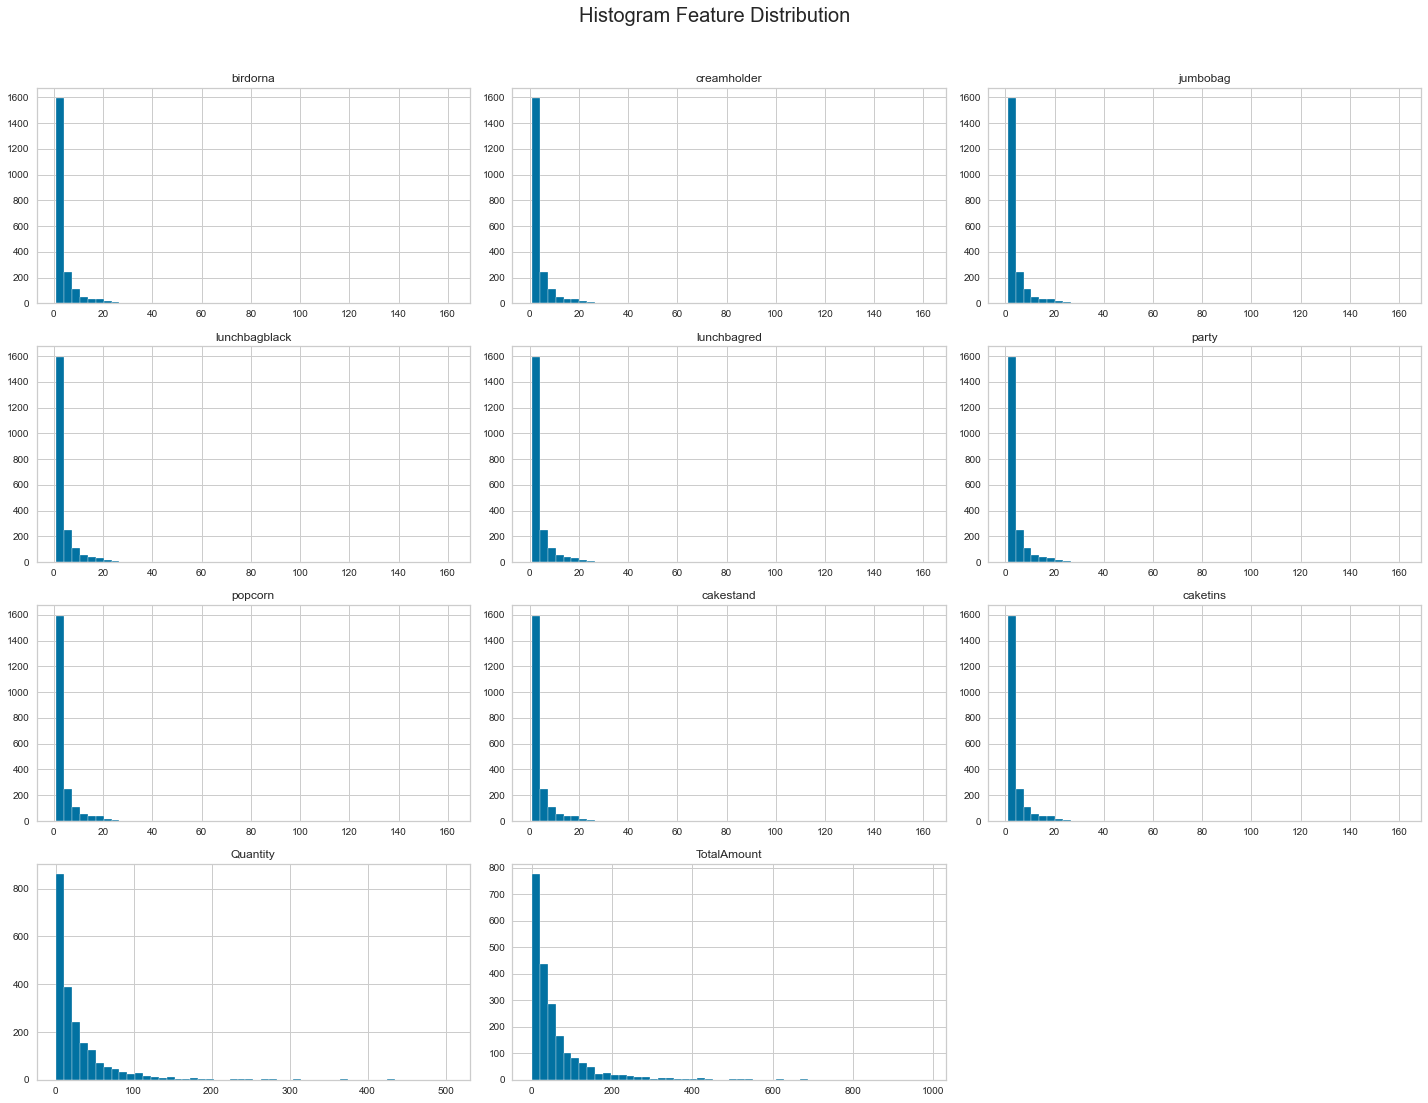

In [32]:
df.hist(bins=50, figsize=(20,15))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

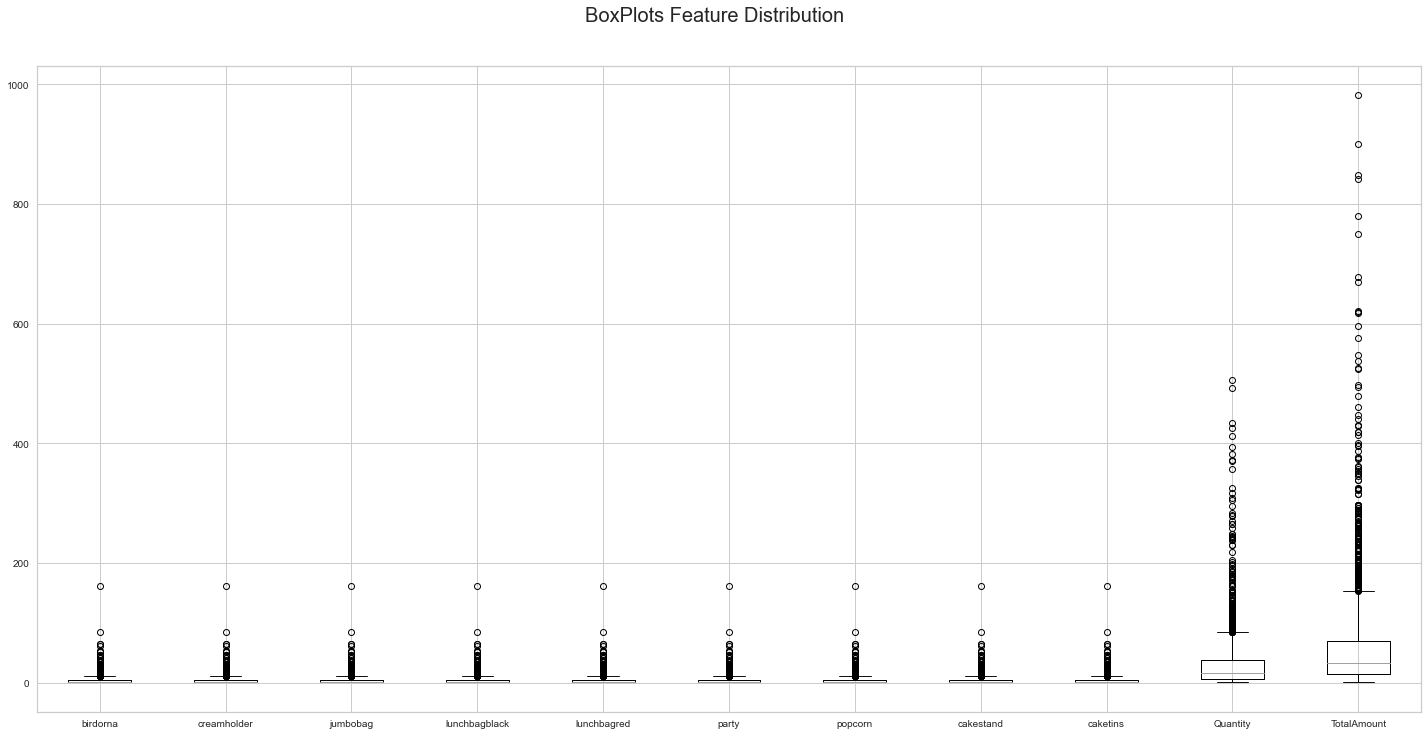

In [33]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

### Regression plot

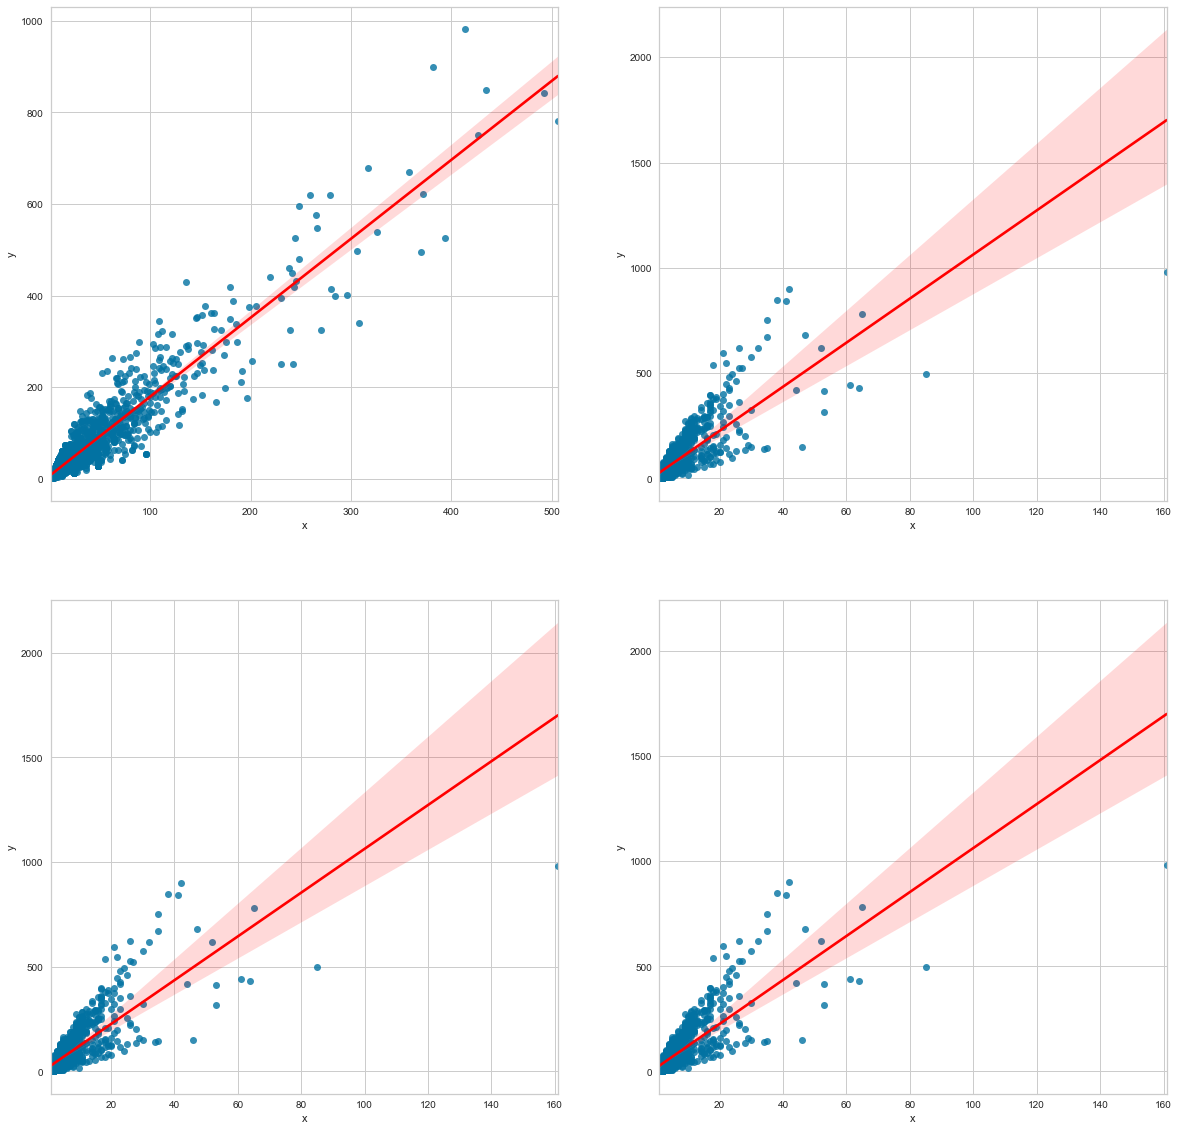

In [34]:
line_color = {'color': 'red'}
fig , ax = plt.subplots(2,2, figsize=(20,20))

#

ax1 = sns.regplot(x=df.Quantity, y=df.TotalAmount, line_kws=line_color, data=df, ax=ax[0,0])
ax1.set_xlabel("x")
ax1.set_ylabel("y")


#

ax2 = sns.regplot(x=df.caketins, y=df.TotalAmount, line_kws=line_color,  data=df, ax=ax[0,1])
ax2.set_xlabel("x")
ax2.set_ylabel("y")


#

ax3 = sns.regplot(x=df.party, y=df.TotalAmount, line_kws=line_color,  data=df, ax=ax[1,0])
ax3.set_xlabel("x")
ax3.set_ylabel("y")

#

ax4 = sns.regplot(x=df.jumbobag, y=df.TotalAmount, line_kws=line_color,  data=df, ax=ax[1,1])
ax4.set_xlabel("x")
ax4.set_ylabel("y")

plt.show()

### Correlation

In [35]:
df.corr()

,birdorna,creamholder,jumbobag,lunchbagblack,lunchbagred,party,popcorn,cakestand,caketins,Quantity,TotalAmount
birdorna,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.78,0.82
creamholder,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.78,0.82
jumbobag,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.78,0.82
lunchbagblack,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.78,0.82
lunchbagred,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.78,0.82
party,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.78,0.82
popcorn,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.78,0.82
cakestand,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.78,0.82
caketins,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.78,0.82
Quantity,0.78,0.78,0.78,0.78,0.78,0.78,0.78,0.78,0.78,1.00,0.94


In [36]:
df.corr()["TotalAmount"].sort_values()

birdorna        0.82
creamholder     0.82
jumbobag        0.82
lunchbagblack   0.82
lunchbagred     0.82
party           0.82
popcorn         0.82
cakestand       0.82
caketins        0.82
Quantity        0.94
TotalAmount     1.00
Name: TotalAmount, dtype: float64

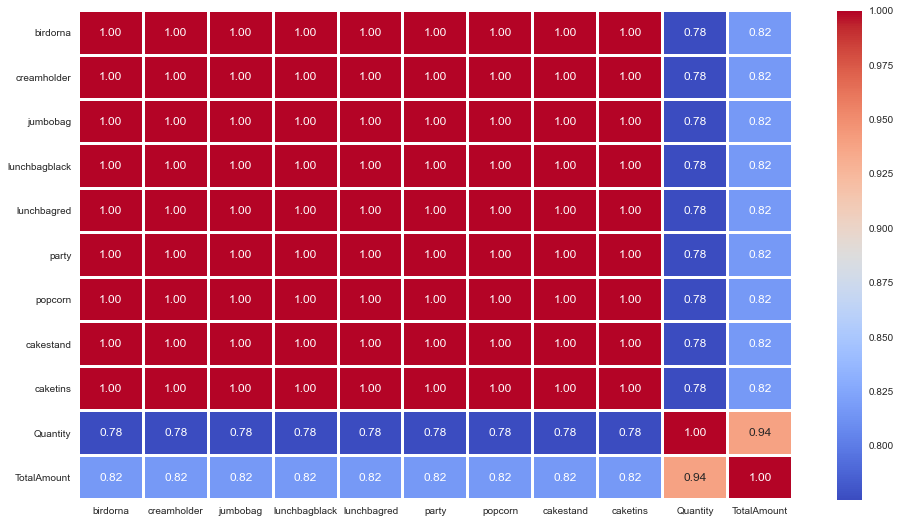

In [37]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("", fontsize=20)
plt.show()

### Train Test Split

In [38]:
df.shape

(2130, 11)

In [39]:
X = df.iloc[:,:10]
y = df.iloc[:,10]

### Train Test Split Cont'd

In [40]:
X.values, y.values

(array([[ 10,  10,  10, ...,  10,  10, 126],
        [ 85,  85,  85, ...,  85,  85, 306],
        [  4,   4,   4, ...,   4,   4,  20],
        ...,
        [  1,   1,   1, ...,   1,   1,   3],
        [  1,   1,   1, ...,   1,   1,   8],
        [ 46,  46,  46, ...,  46,  46,  86]], dtype=int64),
 array([262.2 , 496.98,  72.92, ...,  14.85,  13.52, 149.75]))

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1704, 10), (426, 10), (1704,), (426,))

### Model Training

### Using PyCaret

In [43]:
exp_reg = setup(data = df, target = 'TotalAmount', session_id=0, normalize=True, train_size=0.8) 

,Description,Value
0,session_id,0
1,Target,TotalAmount
2,Original Data,"(2130, 11)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1704, 1)"


In [44]:
compare_models(exclude=['omp','br','ard','par','ransac','tr','huber','kr',
                        'et','ada','gbr','mlp','xgboost','lightgbm','dummy'],fold=5) # For Regressor

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,17.8544,947.2179,30.6364,0.8783,0.5063,0.6268,1.0380
ridge,Ridge Regression,17.8528,947.0163,30.6332,0.8783,0.5067,0.6282,0.0160
lar,Least Angle Regression,17.8544,947.2178,30.6364,0.8783,0.5063,0.6268,0.0120
lasso,Lasso Regression,17.8386,945.4307,30.6067,0.8782,0.5136,0.6506,0.0140
knn,K Neighbors Regressor,18.7626,1069.5026,32.3929,0.8655,0.4820,0.5074,0.0160
rf,Random Forest Regressor,18.9095,1320.4425,35.7696,0.8376,0.4547,0.4834,0.1520
dt,Decision Tree Regressor,19.8150,1551.9575,38.9230,0.8060,0.4593,0.4873,0.0160
en,Elastic Net,24.6143,1784.9168,41.8493,0.7769,0.7814,1.5256,0.0160
llar,Lasso Least Angle Regression,28.0081,2325.9701,47.7545,0.7105,0.8544,1.8134,0.0160


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [45]:
model_selected = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,15.1179,675.4857,25.9901,0.8989,0.4976,0.6126
1,18.1849,863.1987,29.3802,0.8657,0.4670,0.5386
2,20.6759,1448.6964,38.0617,0.8307,0.5069,0.6861
3,15.9946,710.1837,26.6493,0.8728,0.5201,0.6645
4,22.6746,1543.4596,39.2869,0.8911,0.4940,0.5404
5,15.8462,631.7058,25.1338,0.9371,0.4976,0.6352
6,15.3795,601.7423,24.5304,0.9108,0.5010,0.5899
7,17.3073,794.6956,28.1903,0.8642,0.5079,0.6291
8,19.0434,983.9913,31.3686,0.8548,0.5400,0.7465
9,17.8353,1130.3765,33.6211,0.8890,0.5376,0.6510


In [46]:
print(model_selected)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)


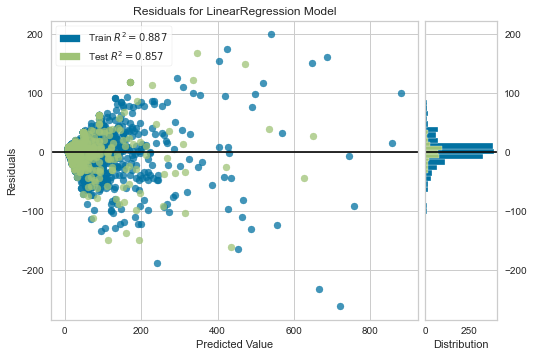

In [47]:
plot_model(model_selected)

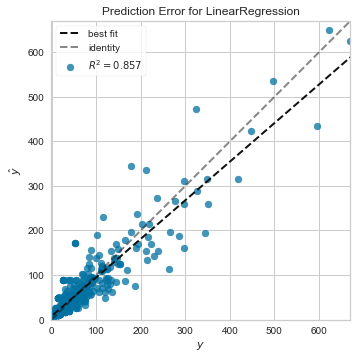

In [48]:
plot_model(model_selected, plot = 'error')

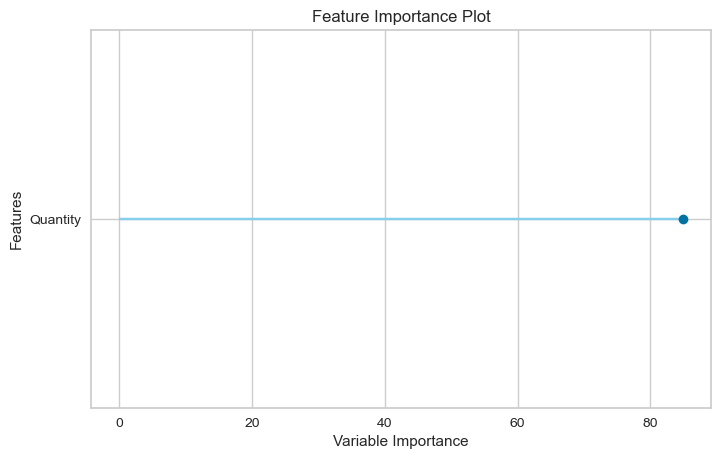

In [49]:
plot_model(model_selected, plot='feature')

In [50]:
predict_model(model_selected)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,19.0883,1077.0009,32.8177,0.8566,0.5374,0.7292


,Quantity,TotalAmount,Label
0,1.51,102.40,189.45
1,-0.16,118.80,47.64
2,-0.61,9.90,9.59
3,0.73,154.50,123.73
4,0.85,214.20,134.11
...,...,...,...
421,-0.08,33.00,54.56
422,-0.51,34.65,18.24
423,1.59,266.40,196.37
424,-0.16,40.56,47.64


#### Python code done by Dennis Lam